<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Interpolaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clase 30/04/2024

### Interpolación

1. Considera $sin(x)$ en el intervalo [−1, 1]. Usando interpolación baricentrica determina el polinomio de tercer orden ($P_3$) y el error $|sin(x) − P_3|$

In [ ]:
from pylab import *
from sympy import init_printing
from IPython.display import Math, Latex
from itertools import zip_longest
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt


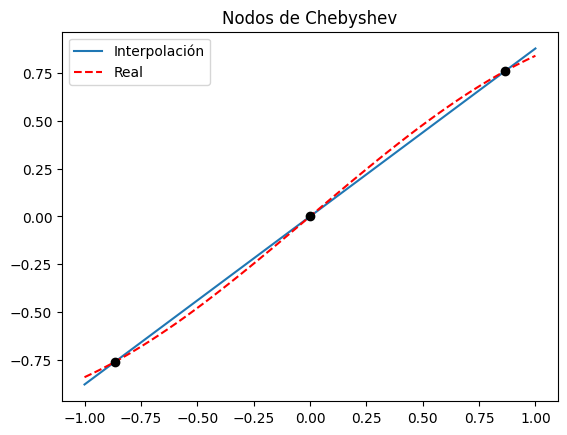

In [ ]:
from scipy.interpolate import barycentric_interpolate
from numpy.polynomial import chebyshev
def f(x):
  return sin(x)

N=3 #los nodos elegidos son -1,0,1
x=np.linspace(-1,1)

coeffs_cheb = [0]*3 + [1]
T3 = chebyshev.Chebyshev(coeffs_cheb, [-1, 1])
xp_ch = T3.roots()
fp_ch = f(xp_ch)
y_ch = barycentric_interpolate(xp_ch, fp_ch, x)

plt.plot(x, y_ch)
plt.plot(x, f(x), '--r')
plt.plot(xp_ch, fp_ch, 'ok')
plt.title("Nodos de Chebyshev")
leg = plt.legend(['Interpolación', 'Real'])


2. Dada la siguiente tabla y función $f(x) = 3.6/x$

| k | $x_k$ | $f(x_k)$ |
| --- | --- | -------- |
| 0 | 1.0 | 3.600 |
| 1 | 2.0 | 1.80 |
| 2 | 3.0 | 1.20 |
| 3 | 4.0 | 0.90 |
| 4 | 5.0 | 0.72 |


a) Calcula la tabla de diferencias divididas para x=2.5,3.5.

b) Escribe los polinomios interpolados de Newton para P1(x), P2(x), P3(x) y P4(x).

In [ ]:
x = [1.0, 2.0, 3.0, 4.0, 5.0]

f_i = [3.6/x[i] for i in range(5)]
f_ii = [(f_i[i+1] - f_i[i])/(x[i+1] - x[i]) for i in range(4)]
f_iii = [(f_ii[i+1] - f_ii[i])/(x[i+2] - x[i]) for i in range(3)]
f_iv = [(f_iii[i+1] - f_iii[i])/(x[i+3] - x[i]) for i in range(2)]
f_v = [(f_iv[i+1] - f_iv[i])/(x[i+4] - x[i]) for i in range(1)]

ffdat = pd.DataFrame(list(zip_longest(f_i, f_ii, f_iii, f_iv, f_v)),
          index=range(5), columns=["f(x_i)", "Df(x_i)", "D^2 f(x_i)", "D^3 f(x_i)", "D^4 f(x_i)"])
ffdat.insert(0, "$x_i$", x)
ffdat

,$x_i$,f(x_i),Df(x_i),D^2 f(x_i),D^3 f(x_i),D^4 f(x_i)
0,1.0,3.60,-1.80,0.60,-0.15,0.03
1,2.0,1.80,-0.60,0.15,-0.03,NaN
2,3.0,1.20,-0.30,0.06,NaN,NaN
3,4.0,0.90,-0.18,NaN,NaN,NaN
4,5.0,0.72,NaN,NaN,NaN,NaN


Los polinomios son:

$P_1(x) = 3.6 -1.8(x-1.0)$

$P_2(x) = P_1 + 0.6(x-1)(x-2)$

$P_3(x) = P_2$ -0.15(x-1)(x-2)(x-3)

$P_4(x) = P_3 + 0.03(x-1)(x-2)(x-3)(x-4)$

In [ ]:
x = 2.5
vreal1 = 3.6/2.5

P = {}
r0 = ffdat.iloc(0)[0]

P[1] = r0[1] + r0[2]*(x-1)
P[2] = P[1] + r0[3]*(x-1)*(x-2)
P[3] = P[2] + r0[4]*(x-1)*(x-2)*(x-3)
P[4] = P[3] + r0[5]*(x-1)*(x-2)*(x-3)*(x-4)

PE = dict([(i, abs(vreal1-P[i]))for i in range(1,5)])
pd.DataFrame([P,PE], index = ['P_n(x)', 'Error'])

,1,2,3,4
P_n(x),0.90,1.35,1.40625,1.423125
Error,0.54,0.09,0.03375,0.016875
